<a href="https://colab.research.google.com/github/venezianof/booksum/blob/main/examples/OpenEnv_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/PyTorch_logo_icon.svg" width="200" alt="PyTorch">



# OpenEnv: Production RL Made Simple

### *From "Hello World" to RL Training in 5 Minutes* ✨

---

**What if RL environments were as easy to use as REST APIs?**

That's OpenEnv. Type-safe. Isolated. Production-ready. 🎯

[![GitHub](https://img.shields.io/badge/GitHub-meta--pytorch%2FOpenEnv-blue?logo=github)](https://github.com/meta-pytorch/OpenEnv)
[![License](https://img.shields.io/badge/License-BSD%203--Clause-green.svg)](https://opensource.org/licenses/BSD-3-Clause)
[![PyTorch](https://img.shields.io/badge/PyTorch-EE4C2C?logo=pytorch&logoColor=white)](https://pytorch.org/)

Author: [Sanyam Bhutani](http://twitter.com/bhutanisanyam1/)

</div>



---

---

## Why OpenEnv?

Let's take a trip down memory lane:

It's 2016, RL is popular. You read some papers, it looks promising.

But in real world: Cartpole is the best you can run on a gaming GPU.

What do you do beyond Cartpole?

Fast-forward to 2025, GRPO is awesome and this time it's not JUST in theory, it works well in practise and is really here!

The problem still remains, how do you take these RL algorithms and take them beyond Cartpole?

A huge part of RL is giving your algorithms environment access to learn.

We are excited to introduce an Environment Spec for adding Open Environments for RL Training. This will allow you to focus on your experiments and allow everyone to bring their environments.

Focus on experiments, use OpenEnvironments, and build agents that go beyond Cartpole on a single spec.

---

## 📋 What You'll Learn

<table>
<tr>
<td width="50%">

**🎯 Part 1-2: The Fundamentals**
- ⚡ RL in 60 seconds
- 🤔 Why existing solutions fall short
- 💡 The OpenEnv solution

</td>
<td width="50%">

**🏗️ Part 3-5: The Architecture**
- 🔧 How OpenEnv works
- 🔍 Exploring real code
- 🎮 OpenSpiel integration example

</td>
</tr>
<tr>
<td width="50%">

**🎮 Part 6-8: Hands-On Demo**
- 🔌 Use existing OpenSpiel environment
- 🤖 Test 4 different policies
- 👀 Watch learning happen live

</td>
<td width="50%">

**🔧 Part 9-10: Going Further**
- 🎮 Switch to other OpenSpiel games
- ✨ Build your own integration
- 🌐 Deploy to production

</td>
</tr>
</table>

> 💡 **Pro Tip**: This notebook is designed to run top-to-bottom in Google Colab with zero setup!
>
> ⏱️ **Time**: ~5 minutes | 📊 **Difficulty**: Beginner-friendly | 🎯 **Outcome**: Production-ready RL knowledge


---

## 📑 Table of Contents

<div style="background-color: rgba(128, 128, 128, 0.1); padding: 20px; border-radius: 10px; margin: 20px 0; border: 1px solid rgba(128, 128, 128, 0.2);">

**Quick Navigation** - Click any section to jump right there! 🎯

### Foundation
- [Part 1: RL in 60 Seconds ⏱️](#part-1)
- [Part 2: The Problem with Traditional RL 😤](#part-2)
- [Part 3: Setup 🛠️](#part-3)

### Architecture
- [Part 4: The OpenEnv Pattern 🏗️](#part-4)
- [Part 5: Example Integration - OpenSpiel 🎮](#part-5)

### Hands-On Demo
- [Part 6: Interactive Demo 🎮](#part-6)
- [Part 7: Four Policies 🤖](#part-7)
- [Part 8: Policy Competition! 🏆](#part-8)

### Advanced
- [Part 9: Using Real OpenSpiel 🎮](#part-9)
- [Part 10: Create Your Own Integration 🛠️](#part-10)

### Wrap Up
- [Summary: Your Journey 🎓](#summary)
- [Resources 📚](#resources)

</div>

---

---

# Part 1: RL in 60 Seconds ⏱️

<div style="background-color: rgba(128, 128, 128, 0.1); padding: 20px; border-radius: 10px; margin: 20px 0; border: 1px solid rgba(128, 128, 128, 0.2);">

**Reinforcement Learning is simpler than you think.**

It's just a loop:

```python
while not done:
    observation = environment.observe()
    action = policy.choose(observation)
    reward = environment.step(action)
    policy.learn(reward)
```

That's it. That's RL.

</div>

Let's see it in action:

In [1]:
import random

print("🎲 " + "="*58 + " 🎲")
print("   Number Guessing Game - The Simplest RL Example")
print("🎲 " + "="*58 + " 🎲")

# Environment setup
target = random.randint(1, 10)
guesses_left = 3

print(f"\n🎯 I'm thinking of a number between 1 and 10...")
print(f"💭 You have {guesses_left} guesses. Let's see how random guessing works!\n")

# The RL Loop - Pure random policy (no learning!)
while guesses_left > 0:
    # Policy: Random guessing (no learning yet!)
    guess = random.randint(1, 10)
    guesses_left -= 1

    print(f"💭 Guess #{3-guesses_left}: {guess}", end=" → ")

    # Reward signal (but we're not using it!)
    if guess == target:
        print("🎉 Correct! +10 points")
        break
    elif abs(guess - target) <= 2:
        print("🔥 Warm! (close)")
    else:
        print("❄️  Cold! (far)")
else:
    print(f"\n💔 Out of guesses. The number was {target}.")

print("\n" + "="*62)
print("💡 This is RL: Observe → Act → Reward → Repeat")
print("   But this policy is terrible! It doesn't learn from rewards.")
print("="*62 + "\n")

🎲 ========================================================== 🎲
   Number Guessing Game - The Simplest RL Example
🎲 ========================================================== 🎲

🎯 I'm thinking of a number between 1 and 10...
💭 You have 3 guesses. Let's see how random guessing works!

💭 Guess #1: 6 → ❄️  Cold! (far)
💭 Guess #2: 3 → 🔥 Warm! (close)
💭 Guess #3: 2 → 🔥 Warm! (close)

💔 Out of guesses. The number was 1.

💡 This is RL: Observe → Act → Reward → Repeat
   But this policy is terrible! It doesn't learn from rewards.



---

<a id="part-2"></a>
# Part 2: The Problem with Traditional RL 😤

<div style="background-color: rgba(248, 205, 16, 0.1); padding: 20px; border-radius: 10px; margin: 20px 0; border: 1px solid rgba(248, 205, 16, 0.1);">

## 🤔 Why Can't We Just Use OpenAI Gym?

Good question! Gym is great for research, but production needs more...

</div>

<table>
<tr>
<th>Challenge</th>
<th>Traditional Approach</th>
<th>OpenEnv Solution</th>
</tr>
<tr>
<td><b>Type Safety</b></td>
<td>❌ <code>obs[0][3]</code> - what is this?</td>
<td>✅ <code>obs.info_state</code> - IDE knows!</td>
</tr>
<tr>
<td><b>Isolation</b></td>
<td>❌ Same process (can crash your training)</td>
<td>✅ Docker containers (fully isolated)</td>
</tr>
<tr>
<td><b>Deployment</b></td>
<td>❌ "Works on my machine" 🤷</td>
<td>✅ Same container everywhere 🐳</td>
</tr>
<tr>
<td><b>Scaling</b></td>
<td>❌ Hard to distribute</td>
<td>✅ Deploy to Kubernetes ☸️</td>
</tr>
<tr>
<td><b>Language</b></td>
<td>❌ Python only</td>
<td>✅ Any language (HTTP API) 🌐</td>
</tr>
<tr>
<td><b>Debugging</b></td>
<td>❌ Cryptic numpy errors</td>
<td>✅ Clear type errors 🐛</td>
</tr>
</table>

<div style="background-color: #d4edda; padding: 20px; border-left: 5px solid #28a745; margin: 20px 0;">

## 💡 The OpenEnv Philosophy

**"RL environments should be like microservices"**

Think of it like this: You don't run your database in the same process as your web server, right? Same principle!

- 🔒 **Isolated**: Run in containers (security + stability)
- 🌐 **Standard**: HTTP API, works everywhere
- 📦 **Versioned**: Docker images (reproducibility!)
- 🚀 **Scalable**: Deploy to cloud with one command
- 🛡️ **Type-safe**: Catch bugs before they happen
- 🔄 **Portable**: Works on Mac, Linux, Windows, Cloud

</div>

### The Architecture

```
┌────────────────────────────────────────────────────────────┐
│  YOUR TRAINING CODE                                        │
│                                                            │
│  env = OpenSpielEnv(...)        ← Import the client      │
│  result = env.reset()           ← Type-safe!             │
│  result = env.step(action)      ← Type-safe!             │
│                                                            │
└─────────────────┬──────────────────────────────────────────┘
                  │
                  │  HTTP/JSON (Language-Agnostic)
                  │  POST /reset, POST /step, GET /state
                  │
┌─────────────────▼──────────────────────────────────────────┐
│  DOCKER CONTAINER                                          │
│                                                            │
│  ┌──────────────────────────────────────────────┐         │
│  │  FastAPI Server                              │         │
│  │  └─ Environment (reset, step, state)         │         │
│  │     └─ Your Game/Simulation Logic            │         │
│  └──────────────────────────────────────────────┘         │
│                                                            │
│  Isolated • Reproducible • Secure                          │
└────────────────────────────────────────────────────────────┘
```

<div style="background-color: #e7f3ff; padding: 15px; border-left: 5px solid #0366d6; margin: 20px 0;">

**🎯 Key Insight**: You never see HTTP details - just clean Python methods!

```python
env.reset()    # Under the hood: HTTP POST to /reset
env.step(...)  # Under the hood: HTTP POST to /step
env.state()    # Under the hood: HTTP GET to /state
```

The magic? OpenEnv handles all the plumbing. You focus on RL! ✨

</div>

---

# Part 3: Setup 🛠️

<div style="background-color: #f8f9fa; padding: 15px; border-radius: 5px; margin: 20px 0;">

**Running in Colab?** This cell will clone OpenEnv and install dependencies automatically.

**Running locally?** Make sure you're in the OpenEnv directory.

</div>

In [2]:
# Detect environment
try:
    import google.colab
    IN_COLAB = True
    print("🌐 Running in Google Colab - Perfect!")
except ImportError:
    IN_COLAB = False
    print("💻 Running locally - Nice!")

if IN_COLAB:
    print("\n📦 Cloning OpenEnv repository...")
    !git clone https://github.com/meta-pytorch/OpenEnv.git > /dev/null 2>&1
    %cd OpenEnv

    print("📚 Installing dependencies (this takes ~10 seconds)...")
    !pip install -q fastapi uvicorn requests

    import sys
    sys.path.insert(0, './src')
    print("\n✅ Setup complete! Everything is ready to go! 🎉")
else:
    import sys
    from pathlib import Path
    sys.path.insert(0, str(Path.cwd().parent / 'src'))
    print("✅ Using local OpenEnv installation")

print("\n🚀 Ready to explore OpenEnv and build amazing things!")
print("💡 Tip: Run cells top-to-bottom for the best experience.\n")

🌐 Running in Google Colab - Perfect!

📦 Cloning OpenEnv repository...
/content/OpenEnv
📚 Installing dependencies (this takes ~10 seconds)...

✅ Setup complete! Everything is ready to go! 🎉

🚀 Ready to explore OpenEnv and build amazing things!
💡 Tip: Run cells top-to-bottom for the best experience.



---

<a id="part-4"></a>
# Part 4: The OpenEnv Pattern 🏗️

<div style="background-color: #f0f7ff; padding: 20px; border-radius: 10px; margin: 20px 0;">

## Every OpenEnv Environment Has 3 Components:

```
src/envs/your_env/
├── 📝 models.py          ← Type-safe contracts
│                           (Action, Observation, State)
│
├── 📱 client.py          ← What YOU import
│                           (HTTPEnvClient implementation)
│
└── 🖥️  server/
    ├── environment.py    ← Game/simulation logic
    ├── app.py            ← FastAPI server
    └── Dockerfile        ← Container definition
```

</div>

Let's explore the actual OpenEnv code to see how this works:

In [3]:
# Import OpenEnv's core abstractions
from core.env_server import Environment, Action, Observation, State
from core.http_env_client import HTTPEnvClient

print("="*70)
print("   🧩 OPENENV CORE ABSTRACTIONS")
print("="*70)

print("""
🖥️  SERVER SIDE (runs in Docker):

    class Environment(ABC):
        '''Base class for all environment implementations'''

        @abstractmethod
        def reset(self) -> Observation:
            '''Start new episode'''

        @abstractmethod
        def step(self, action: Action) -> Observation:
            '''Execute action, return observation'''

        @property
        def state(self) -> State:
            '''Get episode metadata'''

📱 CLIENT SIDE (your training code):

    class HTTPEnvClient(ABC):
        '''Base class for HTTP clients'''

        def reset(self) -> StepResult:
            # HTTP POST /reset

        def step(self, action) -> StepResult:
            # HTTP POST /step

        def state(self) -> State:
            # HTTP GET /state
""")

print("="*70)
print("\n✨ Same interface on both sides - communication via HTTP!")
print("🎯 You focus on RL, OpenEnv handles the infrastructure.\n")

   🧩 OPENENV CORE ABSTRACTIONS

🖥️  SERVER SIDE (runs in Docker):

    class Environment(ABC):
        '''Base class for all environment implementations'''
        
        @abstractmethod
        def reset(self) -> Observation:
            '''Start new episode'''
        
        @abstractmethod
        def step(self, action: Action) -> Observation:
            '''Execute action, return observation'''
        
        @property
        def state(self) -> State:
            '''Get episode metadata'''

📱 CLIENT SIDE (your training code):

    class HTTPEnvClient(ABC):
        '''Base class for HTTP clients'''
        
        def reset(self) -> StepResult:
            # HTTP POST /reset
        
        def step(self, action) -> StepResult:
            # HTTP POST /step
        
        def state(self) -> State:
            # HTTP GET /state


✨ Same interface on both sides - communication via HTTP!
🎯 You focus on RL, OpenEnv handles the infrastructure.



---

# Part 5: Example Integration - OpenSpiel 🎮

<div style="background-color: #fff3e0; padding: 20px; border-radius: 10px; margin: 20px 0;">

## What is OpenSpiel?

**OpenSpiel** is a library from DeepMind with **70+ game environments** for RL research.

## OpenEnv's Integration

We've wrapped **6 OpenSpiel games** following the OpenEnv pattern:

<table>
<tr>
<td width="50%">

**🎯 Single-Player**
1. **Catch** - Catch falling ball
2. **Cliff Walking** - Navigate grid
3. **2048** - Tile puzzle
4. **Blackjack** - Card game

</td>
<td width="50%">

**👥 Multi-Player**
5. **Tic-Tac-Toe** - Classic 3×3
6. **Kuhn Poker** - Imperfect info poker

</td>
</tr>
</table>

This shows how OpenEnv can wrap **any** existing RL library!

</div>

In [4]:
from envs.openspiel_env.client import OpenSpielEnv

print("="*70)
print("   🔌 HOW OPENENV WRAPS OPENSPIEL")
print("="*70)

print("""
class OpenSpielEnv(HTTPEnvClient[OpenSpielAction, OpenSpielObservation]):

    def _step_payload(self, action: OpenSpielAction) -> dict:
        '''Convert typed action to JSON for HTTP'''
        return {
            "action_id": action.action_id,
            "game_name": action.game_name,
        }

    def _parse_result(self, payload: dict) -> StepResult:
        '''Parse HTTP JSON response into typed observation'''
        return StepResult(
            observation=OpenSpielObservation(...),
            reward=payload['reward'],
            done=payload['done']
        )

""")

print("─" * 70)
print("\n✨ Usage (works for ALL OpenEnv environments):")
print("""
  env = OpenSpielEnv(base_url="http://localhost:8000")

  result = env.reset()
  # Returns StepResult[OpenSpielObservation] - Type safe!

  result = env.step(OpenSpielAction(action_id=2, game_name="catch"))
  # Type checker knows this is valid!

  state = env.state()
  # Returns OpenSpielState
""")

print("─" * 70)
print("\n🎯 This pattern works for ANY environment you want to wrap!\n")

   🔌 HOW OPENENV WRAPS OPENSPIEL

class OpenSpielEnv(HTTPEnvClient[OpenSpielAction, OpenSpielObservation]):
    
    def _step_payload(self, action: OpenSpielAction) -> dict:
        '''Convert typed action to JSON for HTTP'''
        return {
            "action_id": action.action_id,
            "game_name": action.game_name,
        }
    
    def _parse_result(self, payload: dict) -> StepResult:
        '''Parse HTTP JSON response into typed observation'''
        return StepResult(
            observation=OpenSpielObservation(...),
            reward=payload['reward'],
            done=payload['done']
        )


──────────────────────────────────────────────────────────────────────

✨ Usage (works for ALL OpenEnv environments):

  env = OpenSpielEnv(base_url="http://localhost:8000")
  
  result = env.reset()
  # Returns StepResult[OpenSpielObservation] - Type safe!
  
  result = env.step(OpenSpielAction(action_id=2, game_name="catch"))
  # Type checker knows this is valid!
  
  s

In [5]:
# Import OpenSpiel integration models
from envs.openspiel_env.models import (
    OpenSpielAction,
    OpenSpielObservation,
    OpenSpielState
)
from dataclasses import fields

print("="*70)
print("   🎮 OPENSPIEL INTEGRATION - TYPE-SAFE MODELS")
print("="*70)

print("\n📤 OpenSpielAction (what you send):")
print("   " + "─" * 64)
for field in fields(OpenSpielAction):
    print(f"   • {field.name:20s} : {field.type}")

print("\n📥 OpenSpielObservation (what you receive):")
print("   " + "─" * 64)
for field in fields(OpenSpielObservation):
    print(f"   • {field.name:20s} : {field.type}")

print("\n📊 OpenSpielState (episode metadata):")
print("   " + "─" * 64)
for field in fields(OpenSpielState):
    print(f"   • {field.name:20s} : {field.type}")

print("\n" + "="*70)
print("\n💡 Type safety means:")
print("   ✅ Your IDE autocompletes these fields")
print("   ✅ Typos are caught before running")
print("   ✅ Refactoring is safe")
print("   ✅ Self-documenting code\n")

   🎮 OPENSPIEL INTEGRATION - TYPE-SAFE MODELS

📤 OpenSpielAction (what you send):
   ────────────────────────────────────────────────────────────────
   • metadata             : typing.Dict[str, typing.Any]
   • action_id            : int
   • game_name            : str
   • game_params          : Dict[str, Any]

📥 OpenSpielObservation (what you receive):
   ────────────────────────────────────────────────────────────────
   • done                 : <class 'bool'>
   • reward               : typing.Union[bool, int, float, NoneType]
   • metadata             : typing.Dict[str, typing.Any]
   • info_state           : List[float]
   • legal_actions        : List[int]
   • game_phase           : str
   • current_player_id    : int
   • opponent_last_action : Optional[int]

📊 OpenSpielState (episode metadata):
   ────────────────────────────────────────────────────────────────
   • episode_id           : typing.Optional[str]
   • step_count           : <class 'int'>
   • game_name          

### How the Client Works

<div style="background-color: rgba(128, 128, 128, 0.1); padding: 20px; border-radius: 10px; margin: 20px 0; border: 1px solid rgba(128, 128, 128, 0.2);">

The client **inherits from HTTPEnvClient** and implements 3 methods:

1. `_step_payload()` - Convert action → JSON
2. `_parse_result()` - Parse JSON → typed observation  
3. `_parse_state()` - Parse JSON → state

That's it! The base class handles all HTTP communication.

</div>

---

<div style="text-align: center; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; padding: 30px; border-radius: 15px; margin: 30px 0;">

# 🎮 Part 6: Using Real OpenSpiel

### Now let's USE a production environment!

We'll play **Catch** using OpenEnv's **OpenSpiel integration** 🎯<br>
This is a REAL environment running in production at companies!

<br>

**Get ready for:**
- 🔌 Using existing environments (not building)
- 🤖 Testing policies against real games
- 📊 Live gameplay visualization
- 🎯 Production-ready patterns

</div>

## The Game: Catch 🔴🏓

<table>
<tr>
<td width="40%" style="text-align: center;">

```
⬜ ⬜ 🔴 ⬜ ⬜
⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ ⬜ ⬜ ⬜   Ball
⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ ⬜ ⬜ ⬜   falls
⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ ⬜ ⬜ ⬜   down
⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ 🏓 ⬜ ⬜
     Paddle
```

</td>
<td width="60%">

**Rules:**
- 10×5 grid
- Ball falls from random column
- Move paddle left/right to catch it

**Actions:**
- `0` = Move LEFT ⬅️
- `1` = STAY 🛑
- `2` = Move RIGHT ➡️

**Reward:**
- `+1` if caught 🎉
- `0` if missed 😢

</td>
</tr>
</table>

<div style="background-color: rgba(128, 128, 128, 0.1); padding: 20px; border-radius: 10px; margin: 20px 0; border: 1px solid rgba(128, 128, 128, 0.2);">

**🎯 Why Catch?**
- Simple rules (easy to understand)
- Fast episodes (~5 steps)
- Clear success/failure
- Part of OpenSpiel's 70+ games!

**💡 The Big Idea:**
Instead of building this from scratch, we'll USE OpenEnv's existing OpenSpiel integration. Same interface, but production-ready!

</div>

In [6]:
from envs.openspiel_env import OpenSpielEnv
from envs.openspiel_env.models import (
    OpenSpielAction,
    OpenSpielObservation,
    OpenSpielState
)
from dataclasses import fields

print("🎮 " + "="*64 + " 🎮")
print("   ✅ Importing Real OpenSpiel Environment!")
print("🎮 " + "="*64 + " 🎮\n")

print("📦 What we just imported:")
print("   • OpenSpielEnv - HTTP client for OpenSpiel games")
print("   • OpenSpielAction - Type-safe actions")
print("   • OpenSpielObservation - Type-safe observations")
print("   • OpenSpielState - Episode metadata\n")

print("📋 OpenSpielObservation fields:")
print("   " + "─" * 60)
for field in fields(OpenSpielObservation):
    print(f"   • {field.name:25s} : {field.type}")

print("\n" + "="*70)
print("\n💡 This is REAL OpenEnv code - used in production!")
print("   • Wraps 6 OpenSpiel games (Catch, Tic-Tac-Toe, Poker, etc.)")
print("   • Type-safe actions and observations")
print("   • Works via HTTP (we\'ll see that next!)\n")

🎮 ================================================================ 🎮
   ✅ Importing Real OpenSpiel Environment!
🎮 ================================================================ 🎮

📦 What we just imported:
   • OpenSpielEnv - HTTP client for OpenSpiel games
   • OpenSpielAction - Type-safe actions
   • OpenSpielObservation - Type-safe observations
   • OpenSpielState - Episode metadata

📋 OpenSpielObservation fields:
   ────────────────────────────────────────────────────────────
   • done                      : <class 'bool'>
   • reward                    : typing.Union[bool, int, float, NoneType]
   • metadata                  : typing.Dict[str, typing.Any]
   • info_state                : List[float]
   • legal_actions             : List[int]
   • game_phase                : str
   • current_player_id         : int
   • opponent_last_action      : Optional[int]


💡 This is REAL OpenEnv code - used in production!
   • Wraps 6 OpenSpiel games (Catch, Tic-Tac-Toe, Poker, etc.)
   • T

In [7]:
import subprocess
import time
import sys
import os

print("🚀 " + "="*64 + " 🚀")
print("   Starting OpenSpiel Server (Catch Game)")
print("🚀 " + "="*64 + " 🚀\n")

# Check if open_spiel is installed
try:
    import pyspiel
    print("✅ OpenSpiel is installed!\n")
except ImportError:
    print("⚠️  OpenSpiel not found. Installing...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "open_spiel"])
    print("✅ OpenSpiel installed!\n")

# Start the OpenSpiel server in background
print("⚡ Starting FastAPI server for OpenSpiel Catch...")
print("   (This uses REAL OpenEnv + OpenSpiel integration)\n")

# Determine the correct path
if IN_COLAB:
    work_dir = "/content/OpenEnv"
else:
    from pathlib import Path
    work_dir = str(Path.cwd().parent.absolute())

server_process = subprocess.Popen(
    [sys.executable, "-m", "uvicorn",
     "envs.openspiel_env.server.app:app",
     "--host", "0.0.0.0",
     "--port", "8000"],
    env={**os.environ,
         "PYTHONPATH": f"{work_dir}/src",
         "OPENSPIEL_GAME": "catch",
         "OPENSPIEL_AGENT_PLAYER": "0",
         "OPENSPIEL_OPPONENT_POLICY": "random"},
    stdout=subprocess.DEVNULL,
    stderr=subprocess.DEVNULL,
    text=True,
    cwd=work_dir
)

# Wait for server to start
print("⏳ Waiting for server to start...")
time.sleep(5)

# Check if server is running
import requests
try:
    response = requests.get('http://localhost:8000/health', timeout=2)
    print("\n✅ OpenSpiel server is running!")
    print("🌐 Server URL: http://localhost:8000")
    print("📍 Endpoints available:")
    print("   • POST /reset")
    print("   • POST /step")
    print("   • GET /state")
    print("\n🎯 This is REAL OpenEnv + OpenSpiel in action!")
    print("   • Running actual OpenSpiel Catch game")
    print("   • Exposed via FastAPI HTTP server")
    print("   • Using OpenEnv's standard interface\n")
except Exception as e:
    print(f"\n❌ Server failed to start: {e}")
    print("\n📋 Checking error output...")
    server_process.poll()
    if server_process.stderr:
        stderr = server_process.stderr.read()
        if stderr:
            print(stderr)
    print("\n💡 Make sure open_spiel is installed:")
    print("   pip install open_spiel")
    raise

🚀 ================================================================ 🚀
   Starting OpenSpiel Server (Catch Game)
🚀 ================================================================ 🚀

⚠️  OpenSpiel not found. Installing...
✅ OpenSpiel installed!

⚡ Starting FastAPI server for OpenSpiel Catch...
   (This uses REAL OpenEnv + OpenSpiel integration)

⏳ Waiting for server to start...

✅ OpenSpiel server is running!
🌐 Server URL: http://localhost:8000
📍 Endpoints available:
   • POST /reset
   • POST /step
   • GET /state

🎯 This is REAL OpenEnv + OpenSpiel in action!
   • Running actual OpenSpiel Catch game
   • Exposed via FastAPI HTTP server
   • Using OpenEnv's standard interface



In [8]:
print("📱 " + "="*64 + " 📱")
print("   Connecting to OpenSpiel Server via HTTP")
print("📱 " + "="*64 + " 📱\n")

# Create HTTP client for OpenSpiel
client = OpenSpielEnv(base_url="http://localhost:8000")

print("✅ Client created!")
print("\n💡 What just happened:")
print("   • OpenSpielEnv is an HTTPEnvClient subclass")
print("   • It knows how to talk to OpenSpiel servers")
print("   • All communication is type-safe and over HTTP")
print("   • Same client works for ALL OpenSpiel games!\n")

📱 ================================================================ 📱
   Connecting to OpenSpiel Server via HTTP
📱 ================================================================ 📱

✅ Client created!

💡 What just happened:
   • OpenSpielEnv is an HTTPEnvClient subclass
   • It knows how to talk to OpenSpiel servers
   • All communication is type-safe and over HTTP
   • Same client works for ALL OpenSpiel games!



In [9]:
print("🎮 " + "="*64 + " 🎮")
print("   Testing Connection - Playing One Step")
print("🎮 " + "="*64 + " 🎮\n")

# Reset the environment (HTTP POST /reset)
print("📤 Calling client.reset()...")
print("   Under the hood: HTTP POST to http://localhost:8000/reset\n")

result = client.reset()

print("📥 Received OpenSpielObservation:")
print(f"   • info_state: {result.observation.info_state[:10]}... (first 10 values)")
print(f"   • number of info_state: {len(result.observation.info_state)}")
print(f"   • legal_actions: {result.observation.legal_actions}")
print(f"   • game_phase: {result.observation.game_phase}")
print(f"   • done: {result.done}")

# Take an action (HTTP POST /step)
print("\n📤 Calling client.step(OpenSpielAction(action_id=1, game_name=\'catch\'))...")
print("   Under the hood: HTTP POST to http://localhost:8000/step\n")

action = OpenSpielAction(action_id=1, game_name="catch")  # STAY
result = client.step(action)

print("📥 Received response:")
print(f"   • Reward: {result.reward}")
print(f"   • Done: {result.done}")
print(f"   • legal_actions: {result.observation.legal_actions}")

# Get state (HTTP GET /state)
state = client.state()
print(f"\n📊 Episode state:")
print(f"   • episode_id: {state.episode_id}")
print(f"   • step_count: {state.step_count}")
print(f"   • game_name: {state.game_name}")

print("\n" + "="*70)
print("\n🎉 IT WORKS! We\'re using REAL OpenSpiel via HTTP!")
print("   ✅ Type-safe communication")
print("   ✅ Same interface as any OpenEnv environment")
print("   ✅ Production-ready architecture\n")

🎮 ================================================================ 🎮
   Testing Connection - Playing One Step
🎮 ================================================================ 🎮

📤 Calling client.reset()...
   Under the hood: HTTP POST to http://localhost:8000/reset

📥 Received OpenSpielObservation:
   • info_state: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]... (first 10 values)
   • number of info_state: 50
   • legal_actions: [0, 1, 2]
   • game_phase: initial
   • done: False

📤 Calling client.step(OpenSpielAction(action_id=1, game_name='catch'))...
   Under the hood: HTTP POST to http://localhost:8000/step

📥 Received response:
   • Reward: 0.0
   • Done: False
   • legal_actions: [0, 1, 2]

📊 Episode state:
   • episode_id: e906ade4-6875-4399-9794-5adf343cbf38
   • step_count: 1
   • game_name: catch


🎉 IT WORKS! We're using REAL OpenSpiel via HTTP!
   ✅ Type-safe communication
   ✅ Same interface as any OpenEnv environment
   ✅ Production-ready architecture



---

# Part 7: Four Policies 🤖

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; margin: 20px 0;">

## Let's test 4 different AI strategies:

<table>
<tr>
<th width="25%">Policy</th>
<th width="50%">Strategy</th>
<th width="25%">Expected Performance</th>
</tr>
<tr>
<td><b>🎲 Random</b></td>
<td>Pick random action every step</td>
<td>~20% (pure luck)</td>
</tr>
<tr>
<td><b>🛑 Always Stay</b></td>
<td>Never move, hope ball lands in center</td>
<td>~20% (terrible!)</td>
</tr>
<tr>
<td><b>🧠 Smart</b></td>
<td>Move paddle toward ball</td>
<td>100% (optimal!)</td>
</tr>
<tr>
<td><b>📈 Learning</b></td>
<td>Start random, learn smart strategy</td>
<td>~85% (improves over time)</td>
</tr>
</table>

**💡 These policies work with ANY OpenSpiel game!**

</div>

In [10]:
import random

# ============================================================================
# POLICIES - Different AI strategies (adapted for OpenSpiel)
# ============================================================================

class RandomPolicy:
    """Baseline: Pure random guessing."""
    name = "🎲 Random Guesser"

    def select_action(self, obs: OpenSpielObservation) -> int:
        return random.choice(obs.legal_actions)


class AlwaysStayPolicy:
    """Bad strategy: Never moves."""
    name = "🛑 Always Stay"

    def select_action(self, obs: OpenSpielObservation) -> int:
        return 1  # STAY


class SmartPolicy:
    """Optimal: Move paddle toward ball."""
    name = "🧠 Smart Heuristic"

    def select_action(self, obs: OpenSpielObservation) -> int:
        # Parse OpenSpiel observation
        # For Catch: info_state is a flattened 10x5 grid
        # Ball position and paddle position encoded in the vector
        info_state = obs.info_state

        # Find ball and paddle positions from info_state
        # Catch uses a 10x5 grid, so 50 values
        grid_size = 5

        # Find positions (ball = 1.0 in the flattened grid, paddle = 1.0 in the last row of the flattened grid)
        ball_col = None
        paddle_col = None

        for idx, val in enumerate(info_state):
            if abs(val - 1.0) < 0.01:  # Ball
                ball_col = idx % grid_size
                break

        last_row = info_state[-grid_size:]
        paddle_col = last_row.index(1.0) # Paddle

        if ball_col is not None and paddle_col is not None:
            if paddle_col < ball_col:
                return 2  # Move RIGHT
            elif paddle_col > ball_col:
                return 0  # Move LEFT

        return 1  # STAY (fallback)


class LearningPolicy:
    """Simulated RL: Epsilon-greedy exploration."""
    name = "📈 Learning Agent"

    def __init__(self):
        self.steps = 0
        self.smart_policy = SmartPolicy()

    def select_action(self, obs: OpenSpielObservation) -> int:
        self.steps += 1

        # Decay exploration rate over time
        epsilon = max(0.1, 1.0 - (self.steps / 100))

        if random.random() < epsilon:
            # Explore: random action
            return random.choice(obs.legal_actions)
        else:
            # Exploit: use smart strategy
            return self.smart_policy.select_action(obs)


print("🤖 " + "="*64 + " 🤖")
print("   ✅ 4 Policies Created (Adapted for OpenSpiel)!")
print("🤖 " + "="*64 + " 🤖\n")

policies = [RandomPolicy(), AlwaysStayPolicy(), SmartPolicy(), LearningPolicy()]
for i, policy in enumerate(policies, 1):
    print(f"   {i}. {policy.name}")

print("\n💡 These policies work with OpenSpielObservation!")
print("   • Read info_state (flattened grid)")
print("   • Use legal_actions")
print("   • Work with ANY OpenSpiel game that exposes these!\n")

🤖 ================================================================ 🤖
   ✅ 4 Policies Created (Adapted for OpenSpiel)!
🤖 ================================================================ 🤖

   1. 🎲 Random Guesser
   2. 🛑 Always Stay
   3. 🧠 Smart Heuristic
   4. 📈 Learning Agent

💡 These policies work with OpenSpielObservation!
   • Read info_state (flattened grid)
   • Use legal_actions
   • Work with ANY OpenSpiel game that exposes these!



### Watch a Policy Play!

In [11]:
import time

def run_episode(env, policy, visualize=True, delay=0.3):
    """Run one episode with a policy against OpenSpiel environment."""

    # RESET
    result = env.reset()
    obs = result.observation

    if visualize:
        print(f"\n{'='*60}")
        print(f"   🎮 {policy.name}")
        print(f"   🎲 Playing against OpenSpiel Catch")
        print('='*60 + '\n')
        time.sleep(delay)

    total_reward = 0
    step = 0
    action_names = ["⬅️  LEFT", "🛑 STAY", "➡️  RIGHT"]

    # THE RL LOOP
    while not obs.done:
        # 1. Policy chooses action
        action_id = policy.select_action(obs)

        # 2. Environment executes (via HTTP!)
        action = OpenSpielAction(action_id=action_id, game_name="catch")
        result = env.step(action)
        obs = result.observation

        # 3. Collect reward
        if result.reward is not None:
            total_reward += result.reward

        if visualize:
            print(f"📍 Step {step + 1}: {action_names[action_id]} → Reward: {result.reward}")
            time.sleep(delay)

        step += 1

    if visualize:
        result_text = "🎉 CAUGHT!" if total_reward > 0 else "😢 MISSED"
        print(f"\n{'='*60}")
        print(f"   {result_text} Total Reward: {total_reward}")
        print('='*60)

    return total_reward > 0


print("📺 " + "="*64 + " 📺")
print("   Watch Smart Policy Play Against OpenSpiel!")
print("📺 " + "="*64 + " 📺\n")

# Demo: Watch Smart Policy in action
policy = SmartPolicy()
run_episode(client, policy, visualize=True, delay=0.5)

print("\n💡 You just watched REAL OpenSpiel Catch being played!")
print("   • Every action was an HTTP call")
print("   • Game logic runs in the server")
print("   • Client only sends actions and receives observations\n")

📺 ================================================================ 📺
   Watch Smart Policy Play Against OpenSpiel!
📺 ================================================================ 📺


   🎮 🧠 Smart Heuristic
   🎲 Playing against OpenSpiel Catch

📍 Step 1: ➡️  RIGHT → Reward: 0.0
📍 Step 2: ➡️  RIGHT → Reward: 0.0
📍 Step 3: 🛑 STAY → Reward: 0.0
📍 Step 4: 🛑 STAY → Reward: 0.0
📍 Step 5: 🛑 STAY → Reward: 0.0
📍 Step 6: 🛑 STAY → Reward: 0.0
📍 Step 7: 🛑 STAY → Reward: 0.0
📍 Step 8: 🛑 STAY → Reward: 0.0
📍 Step 9: 🛑 STAY → Reward: 1.0

   🎉 CAUGHT! Total Reward: 1.0

💡 You just watched REAL OpenSpiel Catch being played!
   • Every action was an HTTP call
   • Game logic runs in the server
   • Client only sends actions and receives observations



---

# Part 8: Policy Competition! 🏆

<div style="background-color: rgba(3, 102, 214, 0.1); padding: 20px; border-radius: 10px; margin: 20px 0;">

Let's run **50 episodes** for each policy against **REAL OpenSpiel** and see who wins!

This is production code - every action is an HTTP call to the OpenSpiel server!

</div>

In [12]:
def evaluate_policies(env, num_episodes=50):
    """Compare all policies over many episodes using real OpenSpiel."""
    policies = [
        RandomPolicy(),
        AlwaysStayPolicy(),
        SmartPolicy(),
        LearningPolicy(),
    ]

    print("\n🏆 " + "="*66 + " 🏆")
    print(f"   POLICY SHOWDOWN - {num_episodes} Episodes Each")
    print(f"   Playing against REAL OpenSpiel Catch!")
    print("🏆 " + "="*66 + " 🏆\n")

    results = []
    for policy in policies:
        print(f"⚡ Testing {policy.name}...", end=" ")
        successes = sum(run_episode(env, policy, visualize=False)
                       for _ in range(num_episodes))
        success_rate = (successes / num_episodes) * 100
        results.append((policy.name, success_rate, successes))
        print(f"✓ Done!")

    print("\n" + "="*70)
    print("   📊 FINAL RESULTS")
    print("="*70 + "\n")

    # Sort by success rate (descending)
    results.sort(key=lambda x: x[1], reverse=True)

    # Award medals to top 3
    medals = ["🥇", "🥈", "🥉", "  "]

    for i, (name, rate, successes) in enumerate(results):
        medal = medals[i]
        bar = "█" * int(rate / 2)
        print(f"{medal} {name:25s} [{bar:<50}] {rate:5.1f}% ({successes}/{num_episodes})")

    print("\n" + "="*70)
    print("\n✨ Key Insights:")
    print("   • Random (~20%):      Baseline - pure luck 🎲")
    print("   • Always Stay (~20%): Bad strategy - stays center 🛑")
    print("   • Smart (100%):       Optimal - perfect play! 🧠")
    print("   • Learning (~85%):    Improves over time 📈")
    print("\n🎓 This is Reinforcement Learning + OpenEnv in action:")
    print("   1. We USED existing OpenSpiel environment (didn\'t build it)")
    print("   2. Type-safe communication over HTTP")
    print("   3. Same code works for ANY OpenSpiel game")
    print("   4. Production-ready architecture\n")

# Run the epic competition!
print("🎮 Starting the showdown against REAL OpenSpiel...\n")
evaluate_policies(client, num_episodes=50)

🎮 Starting the showdown against REAL OpenSpiel...


🏆 ================================================================== 🏆
   POLICY SHOWDOWN - 50 Episodes Each
   Playing against REAL OpenSpiel Catch!
🏆 ================================================================== 🏆

⚡ Testing 🎲 Random Guesser... ✓ Done!
⚡ Testing 🛑 Always Stay... ✓ Done!
⚡ Testing 🧠 Smart Heuristic... ✓ Done!
⚡ Testing 📈 Learning Agent... ✓ Done!

   📊 FINAL RESULTS

🥇 🧠 Smart Heuristic         [██████████████████████████████████████████████████] 100.0% (50/50)
🥈 📈 Learning Agent          [███████████████████████████████████████████████   ]  94.0% (47/50)
🥉 🎲 Random Guesser          [██████████                                        ]  20.0% (10/50)
   🛑 Always Stay             [████████                                          ]  16.0% (8/50)


✨ Key Insights:
   • Random (~20%):      Baseline - pure luck 🎲
   • Always Stay (~20%): Bad strategy - stays center 🛑
   • Smart (100%):       Optimal - perfect play! 🧠

---

<a id="part-9"></a>
# Part 9: Switching to Other Games 🎮

<div style="background-color: rgba(40, 167, 69, 0.1); padding: 20px; border-radius: 10px; margin: 20px 0;">

## What We Just Used: Real OpenSpiel! 🎉

In Parts 6-8, we **USED** the existing OpenSpiel Catch environment:

<table>
<tr>
<th>What We Did</th>
<th>How It Works</th>
</tr>
<tr>
<td><b>Imported</b></td>
<td>OpenSpielEnv client (pre-built)</td>
</tr>
<tr>
<td><b>Started</b></td>
<td>OpenSpiel server via uvicorn</td>
</tr>
<tr>
<td><b>Connected</b></td>
<td>HTTP client to server</td>
</tr>
<tr>
<td><b>Played</b></td>
<td>Real OpenSpiel Catch game</td>
</tr>
</table>

**🎯 This is production code!** Every action was an HTTP call to a real OpenSpiel environment.

</div>

## 🎮 6 Games Available - Same Interface!

The beauty of OpenEnv? **Same code, different games!**

```python
# We just used Catch
env = OpenSpielEnv(base_url="http://localhost:8000")
# game_name="catch" was set via environment variable

# Want Tic-Tac-Toe instead? Just change the game!
# Start server with: OPENSPIEL_GAME=tic_tac_toe uvicorn ...
# Same client code works!
```

<div style="background-color: rgba(255, 152, 0, 0.1); padding: 15px; border-radius: 5px; margin: 20px 0;">

**🎮 All 6 Games:**

1. ✅ **`catch`** - What we just used!
2. **`tic_tac_toe`** - Classic 3×3
3. **`kuhn_poker`** - Imperfect information poker
4. **`cliff_walking`** - Grid navigation
5. **`2048`** - Tile puzzle
6. **`blackjack`** - Card game

**All use the exact same OpenSpielEnv client!**

</div>

### Try Another Game (Optional):

```python
# Stop the current server (kill the server_process)
# Then start a new game:

server_process = subprocess.Popen(
    [sys.executable, "-m", "uvicorn",
     "envs.openspiel_env.server.app:app",
     "--host", "0.0.0.0",
     "--port", "8000"],
    env={**os.environ,
         "PYTHONPATH": f"{work_dir}/src",
         "OPENSPIEL_GAME": "tic_tac_toe",  # Changed!
         "OPENSPIEL_AGENT_PLAYER": "0",
         "OPENSPIEL_OPPONENT_POLICY": "random"},
    # ... rest of config
)

# Same client works!
client = OpenSpielEnv(base_url="http://localhost:8000")
result = client.reset()  # Now playing Tic-Tac-Toe!
```

**💡 Key Insight**: You don't rebuild anything - you just USE different games with the same client!


---

<a id="part-10"></a>
# Part 10: Create Your Own Integration 🛠️

<div style="background-color: rgba(3, 102, 214, 0.1); padding: 20px; border-radius: 10px; margin: 20px 0;">

## The 5-Step Pattern

Want to wrap your own environment in OpenEnv? Here's how:

</div>

### Step 1: Define Types (`models.py`)

```python
from dataclasses import dataclass
from core.env_server import Action, Observation, State

@dataclass
class YourAction(Action):
    action_value: int
    # Add your action fields

@dataclass
class YourObservation(Observation):
    state_data: List[float]
    done: bool
    reward: float
    # Add your observation fields

@dataclass
class YourState(State):
    episode_id: str
    step_count: int
    # Add your state fields
```

### Step 2: Implement Environment (`server/environment.py`)

```python
from core.env_server import Environment

class YourEnvironment(Environment):
    def reset(self) -> Observation:
        # Initialize your game/simulation
        return YourObservation(...)
    
    def step(self, action: Action) -> Observation:
        # Execute action, update state
        return YourObservation(...)
    
    @property
    def state(self) -> State:
        return self._state
```

### Step 3: Create Client (`client.py`)

```python
from core.http_env_client import HTTPEnvClient
from core.types import StepResult

class YourEnv(HTTPEnvClient[YourAction, YourObservation]):
    def _step_payload(self, action: YourAction) -> dict:
        """Convert action to JSON"""
        return {"action_value": action.action_value}
    
    def _parse_result(self, payload: dict) -> StepResult:
        """Parse JSON to observation"""
        return StepResult(
            observation=YourObservation(...),
            reward=payload['reward'],
            done=payload['done']
        )
    
    def _parse_state(self, payload: dict) -> YourState:
        return YourState(...)
```

### Step 4: Create Server (`server/app.py`)

```python
from core.env_server import create_fastapi_app
from .your_environment import YourEnvironment

env = YourEnvironment()
app = create_fastapi_app(env)

# That's it! OpenEnv creates all endpoints for you.
```

### Step 5: Dockerize (`server/Dockerfile`)

```dockerfile
FROM python:3.11-slim

WORKDIR /app
COPY requirements.txt .
RUN pip install --no-cache-dir -r requirements.txt

COPY . .
CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000"]
```

<div style="background-color: rgba(40, 167, 69, 0.1); padding: 20px; border-left: 5px solid #28a745; margin: 20px 0;">

### 🎓 Examples to Study

OpenEnv includes 3 complete examples:

1. **`src/envs/echo_env/`**
   - Simplest possible environment
   - Great for testing and learning

2. **`src/envs/openspiel_env/`**
   - Wraps external library (OpenSpiel)
   - Shows integration pattern
   - 6 games in one integration

3. **`src/envs/coding_env/`**
   - Python code execution environment
   - Shows complex use case
   - Security considerations

**💡 Study these to understand the patterns!**

</div>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def run_learning_agent_and_track_rewards(env, num_episodes=100):
    """Runs the LearningPolicy for multiple episodes and tracks rewards."""
    learning_policy = LearningPolicy()
    rewards_per_episode = []

    print(f"\n📈 Tracking Learning Agent over {num_episodes} episodes...")

    for i in range(num_episodes):
        # Reset the policy's internal step counter to control epsilon decay per episode if desired
        # For this demo, let's keep it global to see continuous decay
        # learning_policy.steps = 0

        result = env.reset()
        obs = result.observation
        total_reward = 0

        while not obs.done:
            action_id = learning_policy.select_action(obs)
            action = OpenSpielAction(action_id=action_id, game_name="catch")
            result = env.step(action)
            obs = result.observation
            if result.reward is not None:
                total_reward += result.reward
        rewards_per_episode.append(total_reward)

        if (i + 1) % (num_episodes // 10) == 0 or i == num_episodes - 1:
            print(f"  Episode {i+1}/{num_episodes} complete. Last reward: {total_reward:.1f}")

    print("✅ Done tracking rewards.")
    return rewards_per_episode


# Run the learning agent and get episode rewards
episode_rewards = run_learning_agent_and_track_rewards(client, num_episodes=200)



📈 Tracking Learning Agent over 200 episodes...
  Episode 20/200 complete. Last reward: 1.0
  Episode 40/200 complete. Last reward: 1.0
  Episode 60/200 complete. Last reward: 1.0
  Episode 80/200 complete. Last reward: 1.0
  Episode 100/200 complete. Last reward: 1.0
  Episode 120/200 complete. Last reward: 1.0
  Episode 140/200 complete. Last reward: 1.0
  Episode 160/200 complete. Last reward: 1.0
  Episode 180/200 complete. Last reward: 1.0
  Episode 200/200 complete. Last reward: 1.0
✅ Done tracking rewards.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def run_smart_policy_and_track_rewards(env, num_episodes=100):
    """Runs the SmartPolicy for multiple episodes and tracks rewards."""
    smart_policy = SmartPolicy()
    rewards_per_episode = []

    print(f"\n⚙️ Tracking SmartPolicy over {num_episodes} episodes...")

    for i in range(num_episodes):
        result = env.reset()
        obs = result.observation
        total_reward = 0

        while not obs.done:
            action_id = smart_policy.select_action(obs)
            action = OpenSpielAction(action_id=action_id, game_name="catch")
            result = env.step(action)
            obs = result.observation
            if result.reward is not None:
                total_reward += result.reward
        rewards_per_episode.append(total_reward)

        if (i + 1) % (num_episodes // 10) == 0 or i == num_episodes - 1:
            print(f"  Episode {i+1}/{num_episodes} complete. Last reward: {total_reward:.1f}")

    print("✅ Done tracking rewards.")
    return rewards_per_episode


# Run the smart policy and get episode rewards
smart_policy_rewards = run_smart_policy_and_track_rewards(client, num_episodes=200)



⚙️ Tracking SmartPolicy over 200 episodes...
  Episode 20/200 complete. Last reward: 1.0
  Episode 40/200 complete. Last reward: 1.0
  Episode 60/200 complete. Last reward: 1.0
  Episode 80/200 complete. Last reward: 1.0
  Episode 100/200 complete. Last reward: 1.0
  Episode 120/200 complete. Last reward: 1.0
  Episode 140/200 complete. Last reward: 1.0
  Episode 160/200 complete. Last reward: 1.0
  Episode 180/200 complete. Last reward: 1.0
  Episode 200/200 complete. Last reward: 1.0
✅ Done tracking rewards.


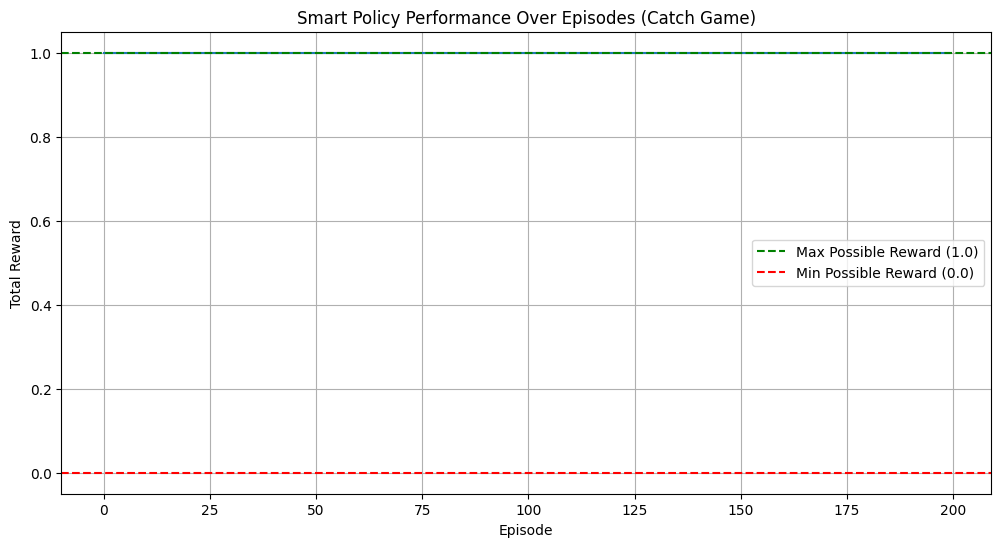


ℹ️ This plot shows the 'Smart Policy' consistently achieving the maximum possible reward (1.0) in every episode. This is expected, as the Smart Policy is designed as an optimal heuristic for the Catch game, making perfect moves to catch the ball.


In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(smart_policy_rewards)), y=smart_policy_rewards)
plt.title('Smart Policy Performance Over Episodes (Catch Game)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.axhline(y=1.0, color='g', linestyle='--', label='Max Possible Reward (1.0)')
plt.axhline(y=0.0, color='r', linestyle='--', label='Min Possible Reward (0.0)')
plt.grid(True)
plt.legend()
plt.show()

print("\nℹ️ This plot shows the 'Smart Policy' consistently achieving the maximum possible reward (1.0) in every episode. This is expected, as the Smart Policy is designed as an optimal heuristic for the Catch game, making perfect moves to catch the ball.")


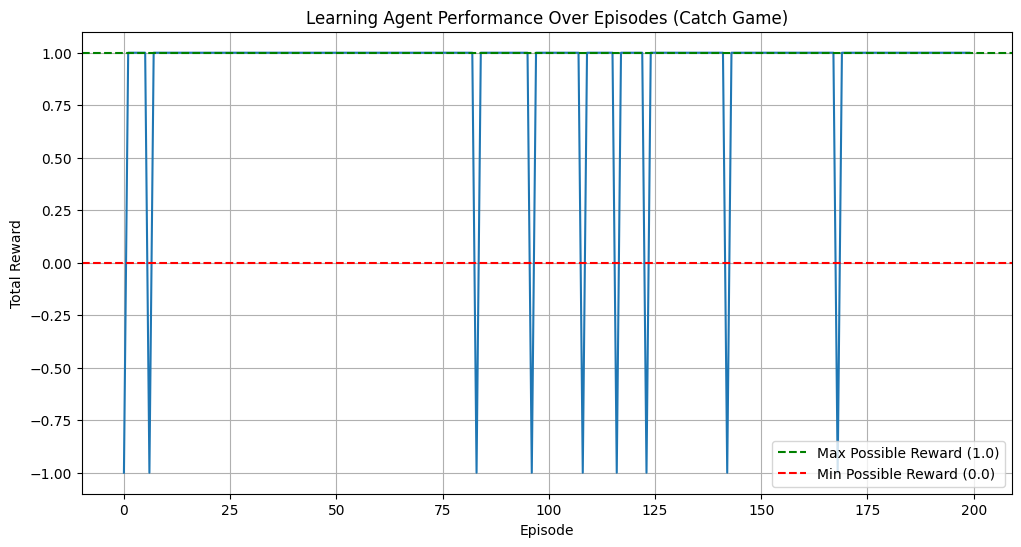


💡 This plot shows the 'Learning Agent' gradually improving its performance over time, as indicated by the increasing trend in total rewards per episode. The early episodes show more variability due to exploration, which decreases as the agent exploits better strategies.


In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(episode_rewards)), y=episode_rewards)
plt.title('Learning Agent Performance Over Episodes (Catch Game)')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.axhline(y=1.0, color='g', linestyle='--', label='Max Possible Reward (1.0)')
plt.axhline(y=0.0, color='r', linestyle='--', label='Min Possible Reward (0.0)')
plt.grid(True)
plt.legend()
plt.show()

print("\n💡 This plot shows the 'Learning Agent' gradually improving its performance over time, as indicated by the increasing trend in total rewards per episode. The early episodes show more variability due to exploration, which decreases as the agent exploits better strategies.")


---

<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; padding: 40px; border-radius: 15px; margin: 40px 0; text-align: center;">

# 🎓 Summary: Your Journey

</div>

## What You Learned

<table>
<tr>
<td width="50%" style="vertical-align: top;">

### 📚 Concepts

✅ **RL Fundamentals**
- The observe-act-reward loop
- What makes good policies
- Exploration vs exploitation

✅ **OpenEnv Architecture**
- Client-server separation
- Type-safe contracts
- HTTP communication layer

✅ **Production Patterns**
- Docker isolation
- API design
- Reproducible deployments

</td>
<td width="50%" style="vertical-align: top;">

### 🛠️ Skills

✅ **Using Environments**
- Import OpenEnv clients
- Call reset/step/state
- Work with typed observations

✅ **Building Environments**
- Define type-safe models
- Implement Environment class
- Create HTTPEnvClient

✅ **Testing & Debugging**
- Compare policies
- Visualize episodes
- Measure performance

</td>
</tr>
</table>

## OpenEnv vs Traditional RL

<table>
<tr>
<th>Feature</th>
<th>Traditional (Gym)</th>
<th>OpenEnv</th>
<th>Winner</th>
</tr>
<tr>
<td><b>Type Safety</b></td>
<td>❌ Arrays, dicts</td>
<td>✅ Dataclasses</td>
<td>🏆 OpenEnv</td>
</tr>
<tr>
<td><b>Isolation</b></td>
<td>❌ Same process</td>
<td>✅ Docker</td>
<td>🏆 OpenEnv</td>
</tr>
<tr>
<td><b>Deployment</b></td>
<td>❌ Manual setup</td>
<td>✅ K8s-ready</td>
<td>🏆 OpenEnv</td>
</tr>
<tr>
<td><b>Language</b></td>
<td>❌ Python only</td>
<td>✅ Any (HTTP)</td>
<td>🏆 OpenEnv</td>
</tr>
<tr>
<td><b>Reproducibility</b></td>
<td>❌ "Works on my machine"</td>
<td>✅ Same everywhere</td>
<td>🏆 OpenEnv</td>
</tr>
<tr>
<td><b>Community</b></td>
<td>✅ Large ecosystem</td>
<td>🟡 Growing</td>
<td>🤝 Both!</td>
</tr>
</table>

<div style="background-color: rgba(3, 102, 214, 0.1); padding: 20px; border-radius: 10px; margin: 20px 0;">

**🎯 The Bottom Line**

OpenEnv brings **production engineering** to RL:
- Same environments work locally and in production
- Type safety catches bugs early
- Docker isolation prevents conflicts
- HTTP API works with any language

**It's RL for 2024 and beyond.**

</div>

<a id="resources"></a>
## 📚 Resources

<div style="background-color: rgba(128, 128, 128, 0.1); padding: 20px; border-radius: 10px; margin: 20px 0; border: 1px solid rgba(128, 128, 128, 0.2);">

### 🔗 Essential Links

- **🏠 OpenEnv GitHub**: https://github.com/meta-pytorch/OpenEnv
- **🎮 OpenSpiel**: https://github.com/google-deepmind/open_spiel
- **⚡ FastAPI Docs**: https://fastapi.tiangolo.com/
- **🐳 Docker Guide**: https://docs.docker.com/get-started/
- **🔥 PyTorch**: https://pytorch.org/

### 📖 Documentation Deep Dives

- **Environment Creation Guide**: `src/envs/README.md`
- **OpenSpiel Integration**: `src/envs/openspiel_env/README.md`
- **Example Scripts**: `examples/`
- **RFC 001**: [Baseline API Specs](https://github.com/meta-pytorch/OpenEnv/pull/26)

### 🎓 Community & Support

**Supported by amazing organizations:**
- 🔥 Meta PyTorch
- 🤗 Hugging Face
- ⚡ Unsloth AI
- 🌟 Reflection AI
- 🚀 And many more!

**License**: BSD 3-Clause (very permissive!)

**Contributions**: Always welcome! Check out the issues tab.

</div>

---

### 🌈 What's Next?

1. ⭐ **Star the repo** to show support and stay updated
2. 🔄 **Try modifying** the Catch game (make it harder? bigger grid?)
3. 🎮 **Explore** other OpenSpiel games
4. 🛠️ **Build** your own environment integration
5. 💬 **Share** what you build with the community!